# Aplicação de Python na Agrometeorologia

Este Jupyter Notebook é parte integrande do curso de Python ministrado durante XXII Congresso Brasiliero de Agrometeorologia realizado nos dias 3, 4 e 5 de outubro de 2023 na cidade Natal/RN.

# Uso de funções em Python

In [1]:
import xarray as xr
import regionmask
import geopandas as gpd
import pandas as pd

def processa_chuva(lista_arquivos, nome_variavel, nome_dimensao_lat, nome_dimensao_lon, arquivo_shapefile, nome_arquivo_csv):
    
    # Abertura dos arquivos NetCDF.
    ds = xr.open_mfdataset(lista_arquivos)
    
    # Importação de variáveis de interesse.
    prec = ds[nome_variavel]
    lat = ds[nome_dimensao_lat]
    lon = ds[nome_dimensao_lon]
    
    # Abertura do arquivo shapefile.
    gdf = gpd.read_file(arquivo_shapefile)
    
    # Domínio espacial do arquivo shapefile.
    dominio_shapefile = regionmask.Regions(
        outlines=gdf.geometry.values,
        numbers=[0],
        names={0:'Bioma Caatinga'},
        abbrevs={0:'Caatinga'},
        name='Bioma_Caatinga', 
    )
    
    # Cria a máscara que será aplicada na variável de interesse.
    # lon e lat são os valores das suas coordenadas.
    mascara = dominio_shapefile.mask(lon_or_obj=lon, lat=lat)
    
    # Aplica a máscara na variável de interesse.
    dado_mascarado = prec.where(mascara == mascara)
    
    # Os nomes 'lat' e 'lon são os nomes que aparecem no seu arquivo. 
    # Não são os valores de 'lat' e nem de 'lon'.
    media_area = dado_mascarado.mean(dim=('lat', 'lon'))
    
    # Cria o DataFrame.
    df = pd.DataFrame(data=media_area, index=prec.time, columns=['Chuva'])
    
    # Define o nome do index como 'Dia'.
    df.index.name = 'Dia'
    
    # Salva o arquivo no formato 'csv'.
    df.to_csv(
        nome_arquivo_csv, 
        sep=',', 
        header=True
    )
    
    return df

# Como chamar a função?

A função gera o arquivo no formato csv e retorna o dataframe (df) para gerar uma figura, por exemplo.

In [2]:
chuva = processa_chuva(
    lista_arquivos='../input/precipitacao/CPC/precip.????.nc', 
    nome_variavel='precip', 
    nome_dimensao_lat='lat', 
    nome_dimensao_lon='lon', 
    arquivo_shapefile='../input/shapefile/caatinga_contorno/caatinga.shp',
    nome_arquivo_csv='../output/xchuva_diaria_cpc_19910901_20221231.csv'
)

In [3]:
chuva

,Chuva
Dia,
1991-01-01,1.083005
1991-01-02,1.132334
1991-01-03,1.101605
1991-01-04,1.662441
1991-01-05,1.765939
...,...
2022-12-27,0.583862
2022-12-28,0.579153
2022-12-29,1.396807


<AxesSubplot:xlabel='Dia'>

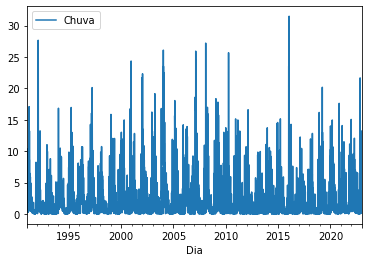

In [4]:
chuva.plot()